# Predicting Bike Rental Demand Using Regression Models

## NAME: Arshad jaseem ch

### ORGANISATION: Entri Elevate

### Date 

### Project Overview:
This project aims to predict the total bike rental demand using regression techniques based on the Bike Sharing Dataset. The dataset contains information on bike rental counts, along with environmental and time-related features such as temperature, humidity, wind speed, season, and weather conditions.

### Objective: 
To build and evaluate regression models to predict the total count of bike rentals (cnt) for a given day or hour based on the provided features.¶

### Data description:

#### Source: UCI Machine Learning Repository
Dataset Name: Bike Sharing Dataset

Rows: 17,379 (Hourly data)

Columns: 16

### Features:

#### The dataset includes the following key features:
1.season: Season of the year (1: Spring, 2: Summer, 3: Fall, 4: Winter)

2.yr: Year (0: 2011, 1: 2012)

3.mnth: Month (1 to 12)

4.hr: Hour of the day (0 to 23)

5.holiday: Whether the day is a holiday (0: No, 1: Yes)

6.weekday: Day of the week (0: Sunday, ..., 6: Saturday)

7.workingday: Whether the day is a working day (0: No, 1: Yes)

8.weathersit: Weather condition (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain)

9.temp: Normalized temperature in Celsius

10.hum: Normalized humidity

11.windspeed: Normalized wind speed

12.cnt: Total count of bike rentals (Target variable)

### Import modules

In [776]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

### Loading the dataset

In [779]:
data = pd.read_csv(r'C:\Users\ARSHAD\Downloads\hour.csv')


In [781]:
df = pd.DataFrame(data)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [785]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Preprocessing the dataset

In [788]:
df.shape

(17379, 17)

In [790]:
df = df.drop(columns = ['dteday'], axis=1)

In [792]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [794]:
df.isnull().sum()


instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking for duplicates

In [797]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [800]:
#Outliers
num_column = df.select_dtypes(include='number')

In [802]:
num_column

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### OUTLINERS DETECTION

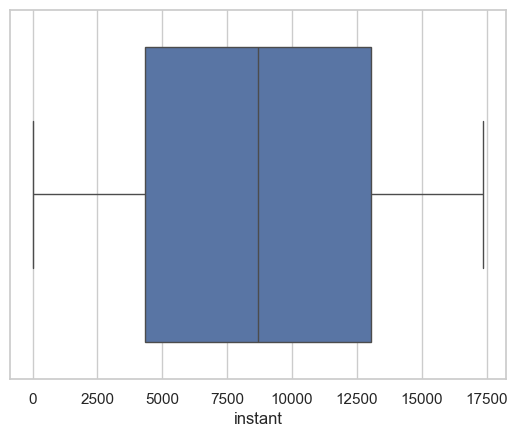

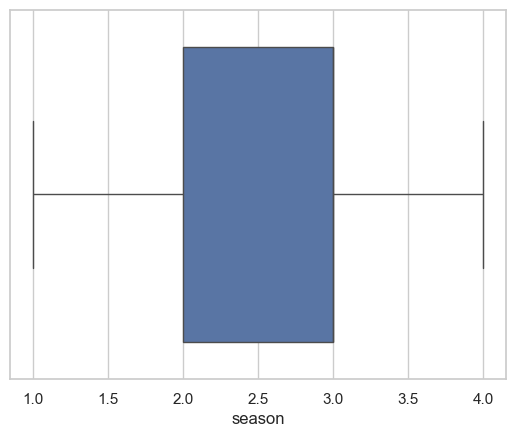

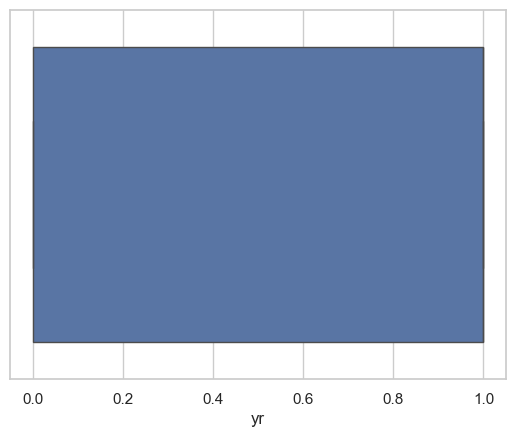

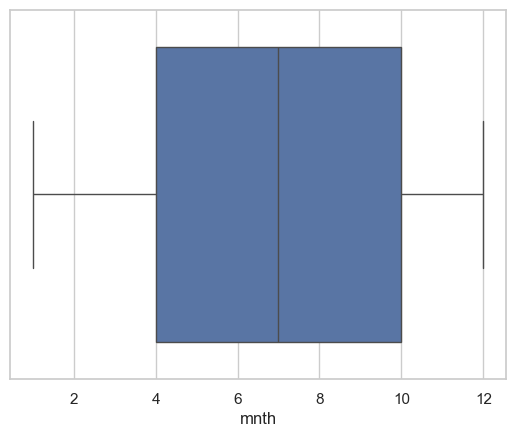

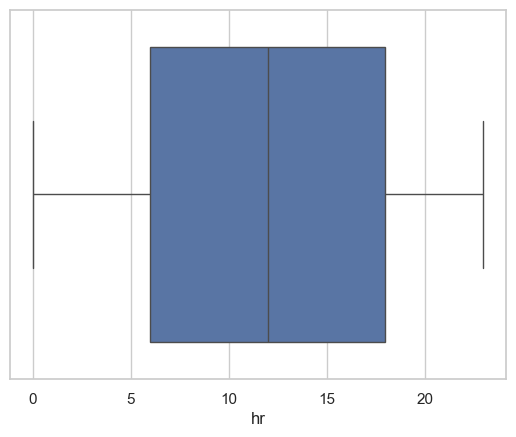

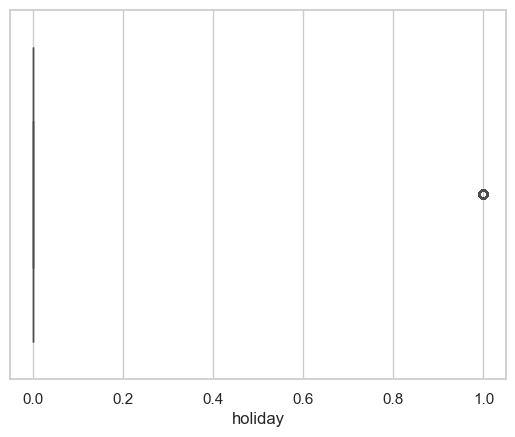

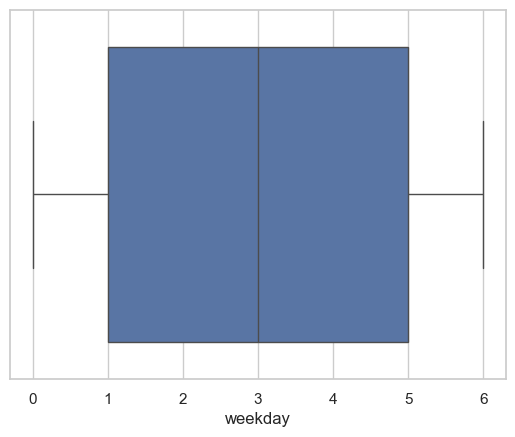

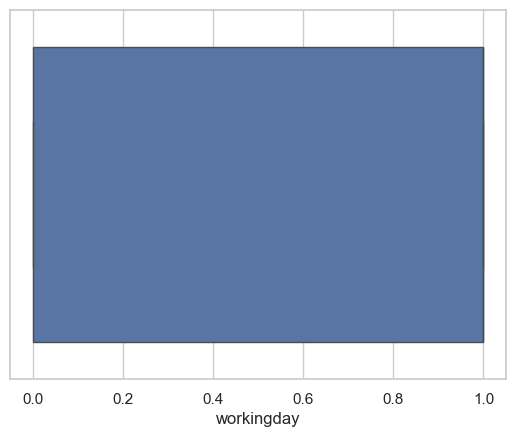

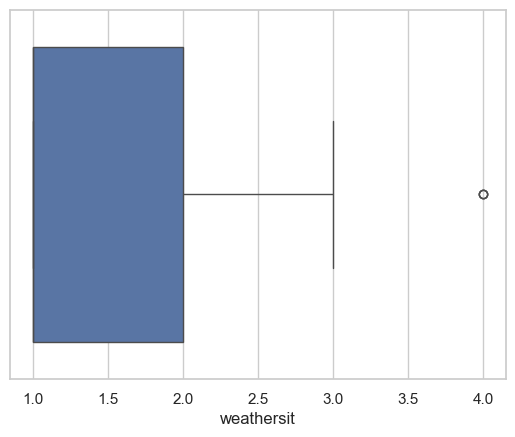

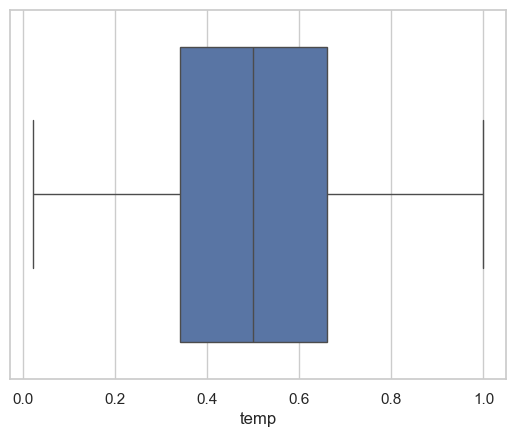

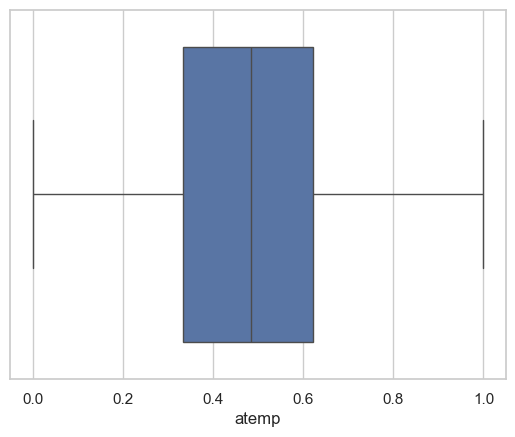

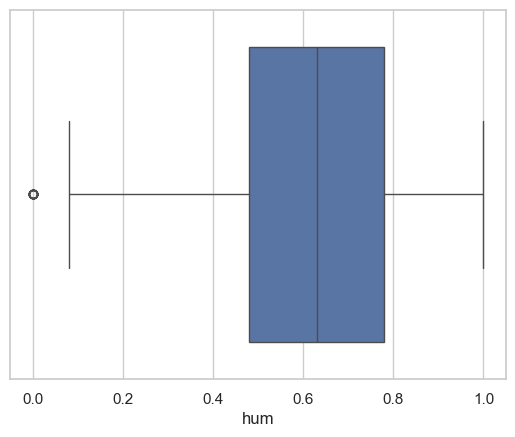

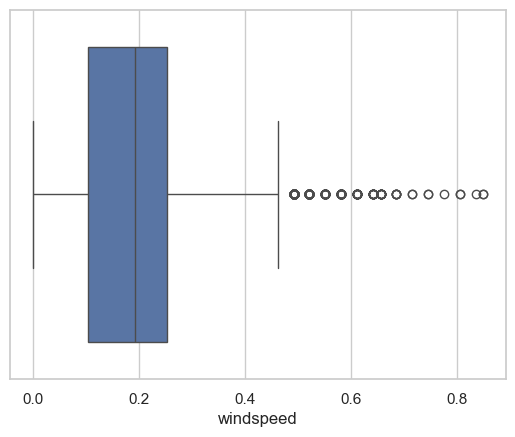

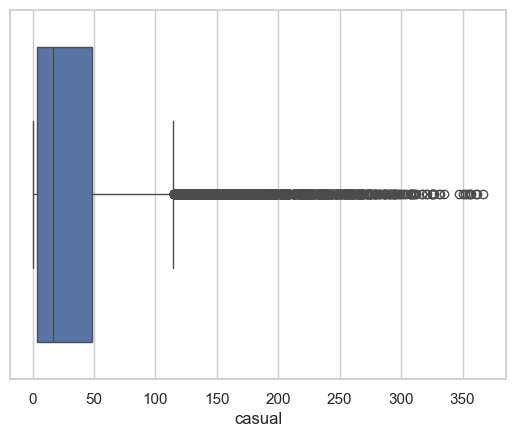

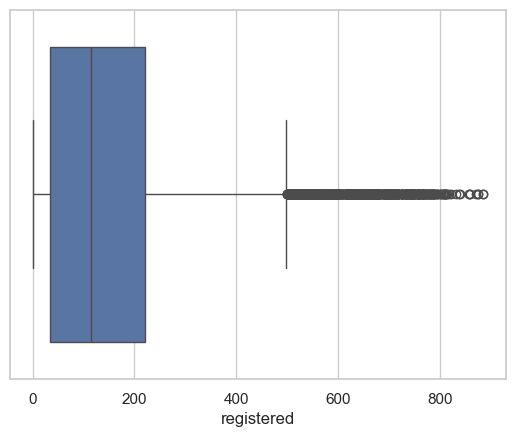

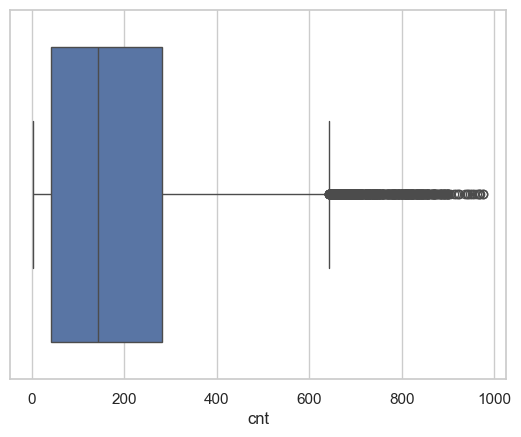

In [805]:
#forloop
for i in num_column.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

### OUTLINERS REMOVAL

In [807]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [808]:
df1 = outliers(df) 

In [809]:
df1.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0.0,6,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,1,0,1,1,0.0,6,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,1,0,1,2,0.0,6,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,1,0,1,3,0.0,6,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,1,0,1,4,0.0,6,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


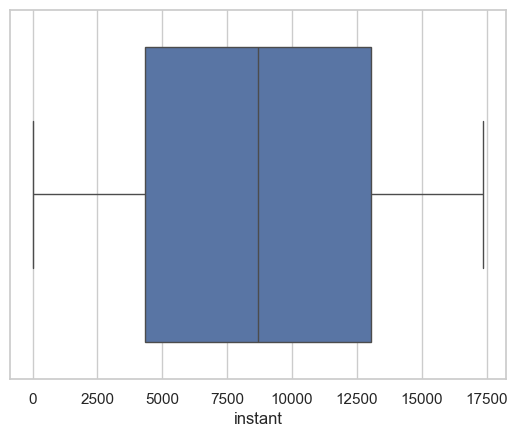

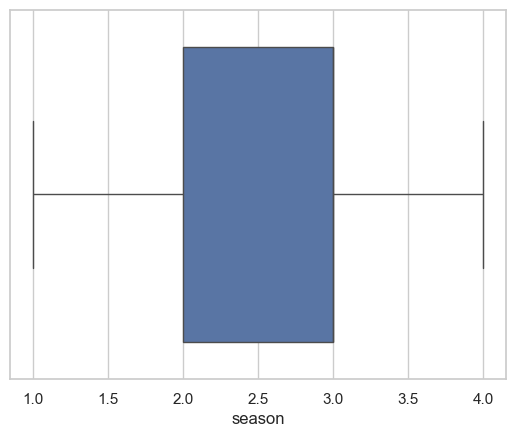

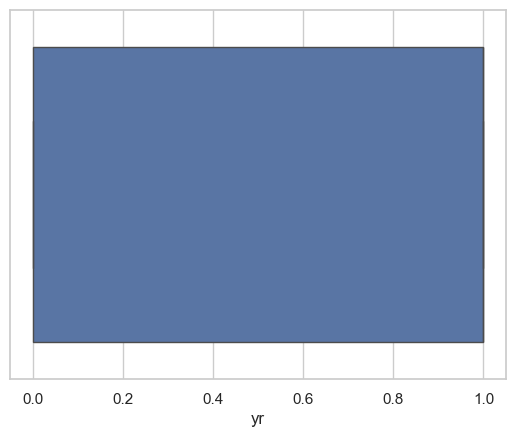

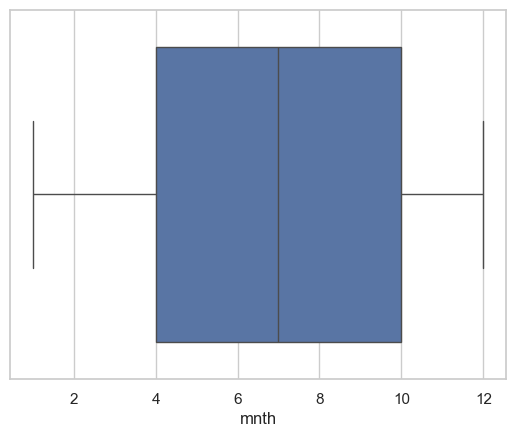

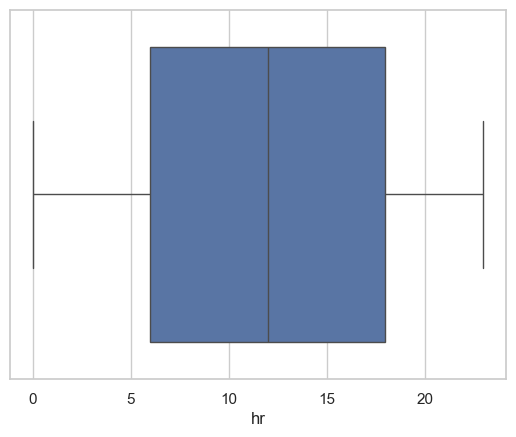

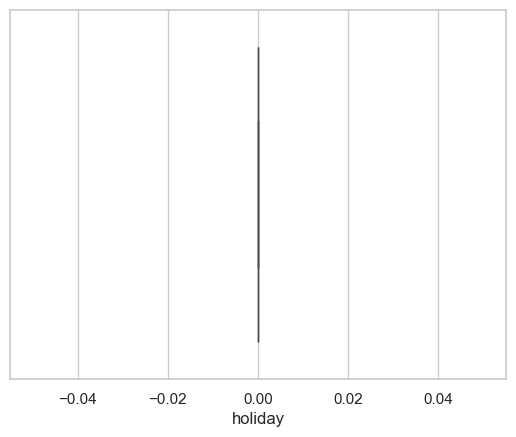

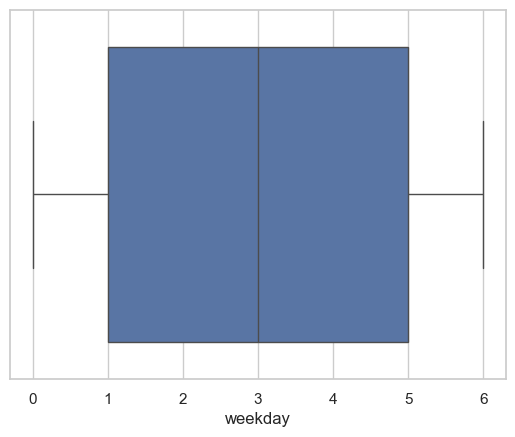

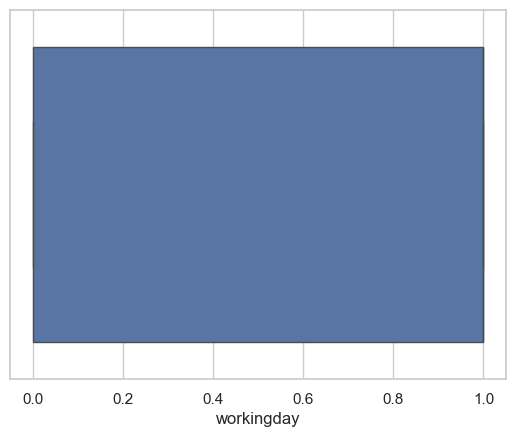

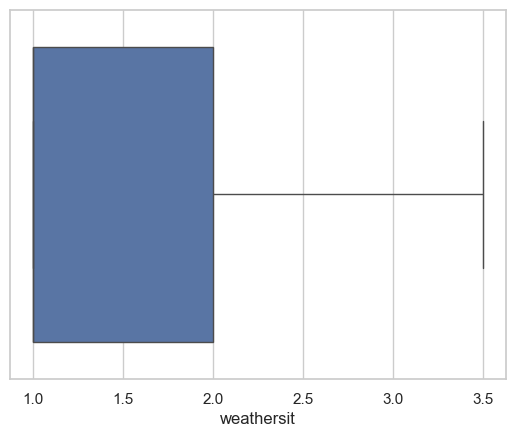

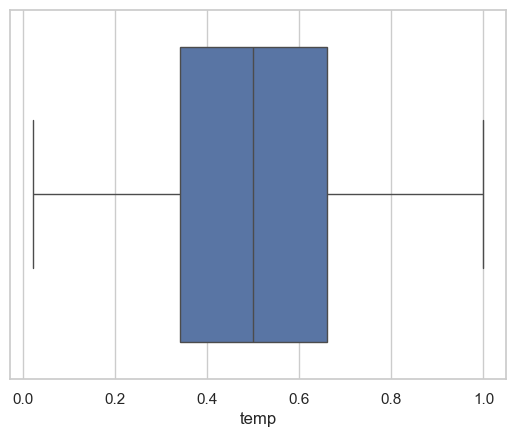

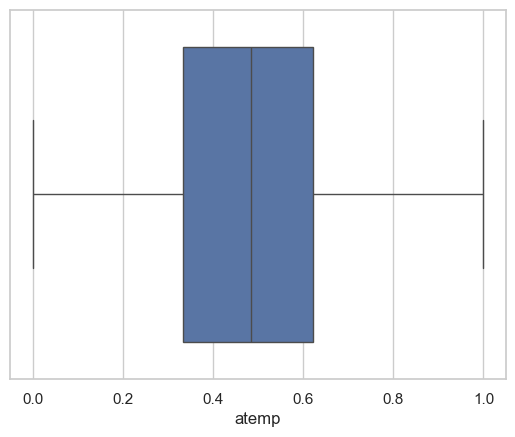

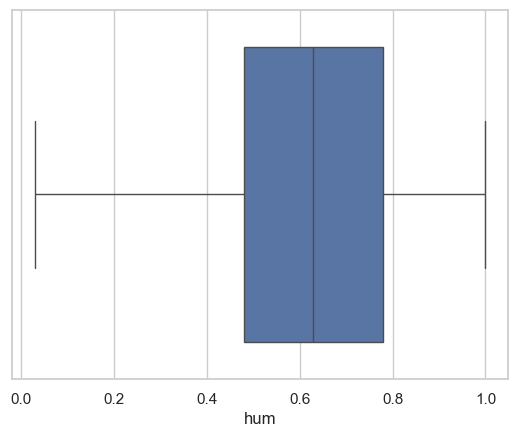

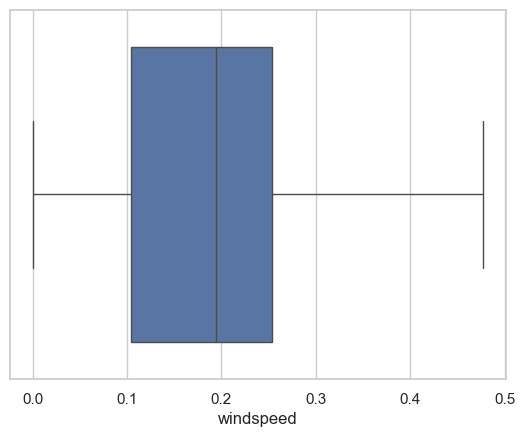

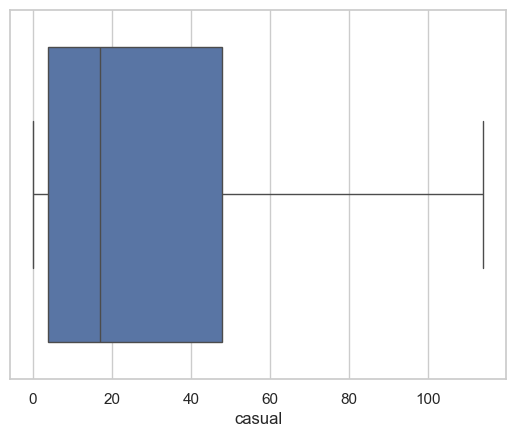

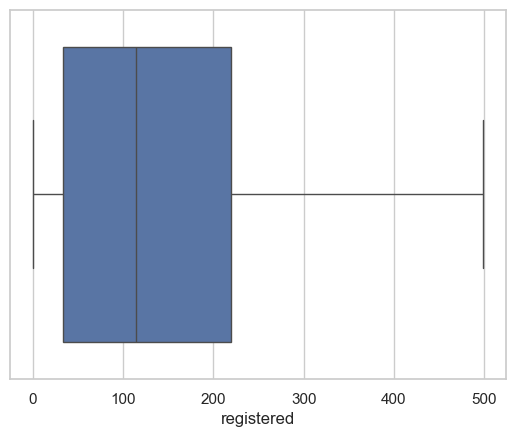

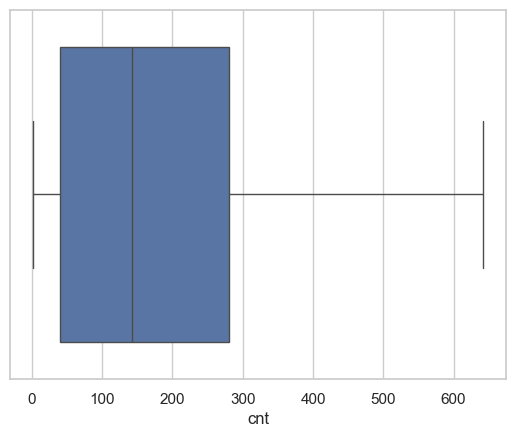

In [814]:
#forloop after iqr
for i in num_column.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

### HANDLING SKEWNESS

In [816]:
df1.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       0.000000
weekday      -0.002998
workingday   -0.785258
weathersit    1.224879
temp         -0.006021
atemp        -0.090429
hum          -0.106127
windspeed     0.343571
casual        1.192145
registered    1.033681
cnt           1.018126
dtype: float64

In [819]:
# Check skewness of numerical columns
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df1[numerical_features].skew())

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       0.000000
weekday      -0.002998
workingday   -0.785258
weathersit    1.224879
temp         -0.006021
atemp        -0.090429
hum          -0.106127
windspeed     0.343571
casual        1.192145
registered    1.033681
cnt           1.018126
dtype: float64


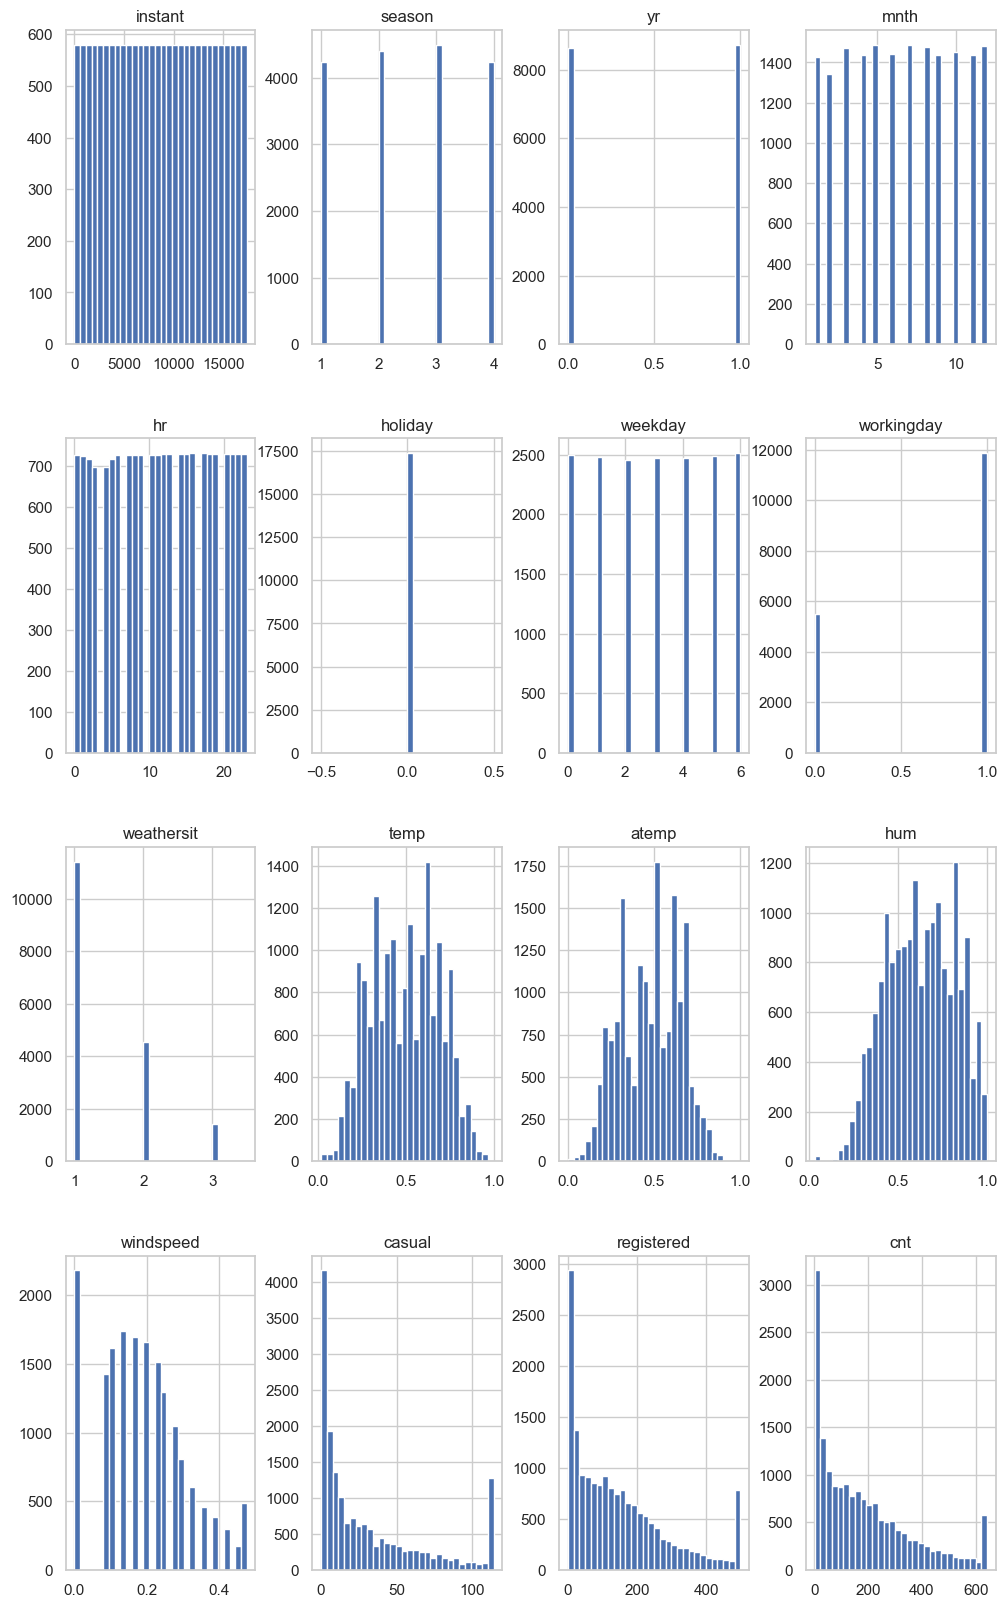

In [821]:
#Plot histograms before transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()

In [822]:
from sklearn.preprocessing import PowerTransformer

# Define numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Apply PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df1[numerical_features] = pt.fit_transform(df[numerical_features])


In [823]:
print(df1[numerical_features].skew())


instant      -0.290779
season       -0.106396
yr           -0.010243
mnth         -0.169206
hr           -0.244558
holiday       0.000000
weekday      -0.194559
workingday   -0.785258
weathersit    0.680252
temp         -0.035287
atemp        -0.042424
hum          -0.045369
windspeed     0.007055
casual       -0.076914
registered   -0.154369
cnt          -0.155453
dtype: float64


<Axes: ylabel='Density'>

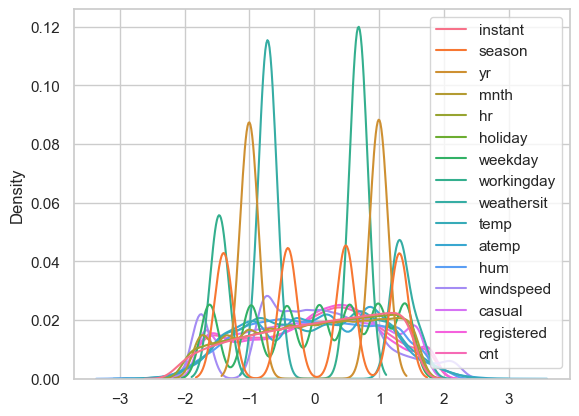

In [824]:
sns.kdeplot(df1)

In [826]:
df1.skew()

instant      -0.290779
season       -0.106396
yr           -0.010243
mnth         -0.169206
hr           -0.244558
holiday       0.000000
weekday      -0.194559
workingday   -0.785258
weathersit    0.680252
temp         -0.035287
atemp        -0.042424
hum          -0.045369
windspeed     0.007055
casual       -0.076914
registered   -0.154369
cnt          -0.155453
dtype: float64

## EXPLORATORY DATA ANALYSIS (EDA)

In [832]:
sns.set(style="whitegrid")


In [834]:
print("Data Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Summary Statistics:
        

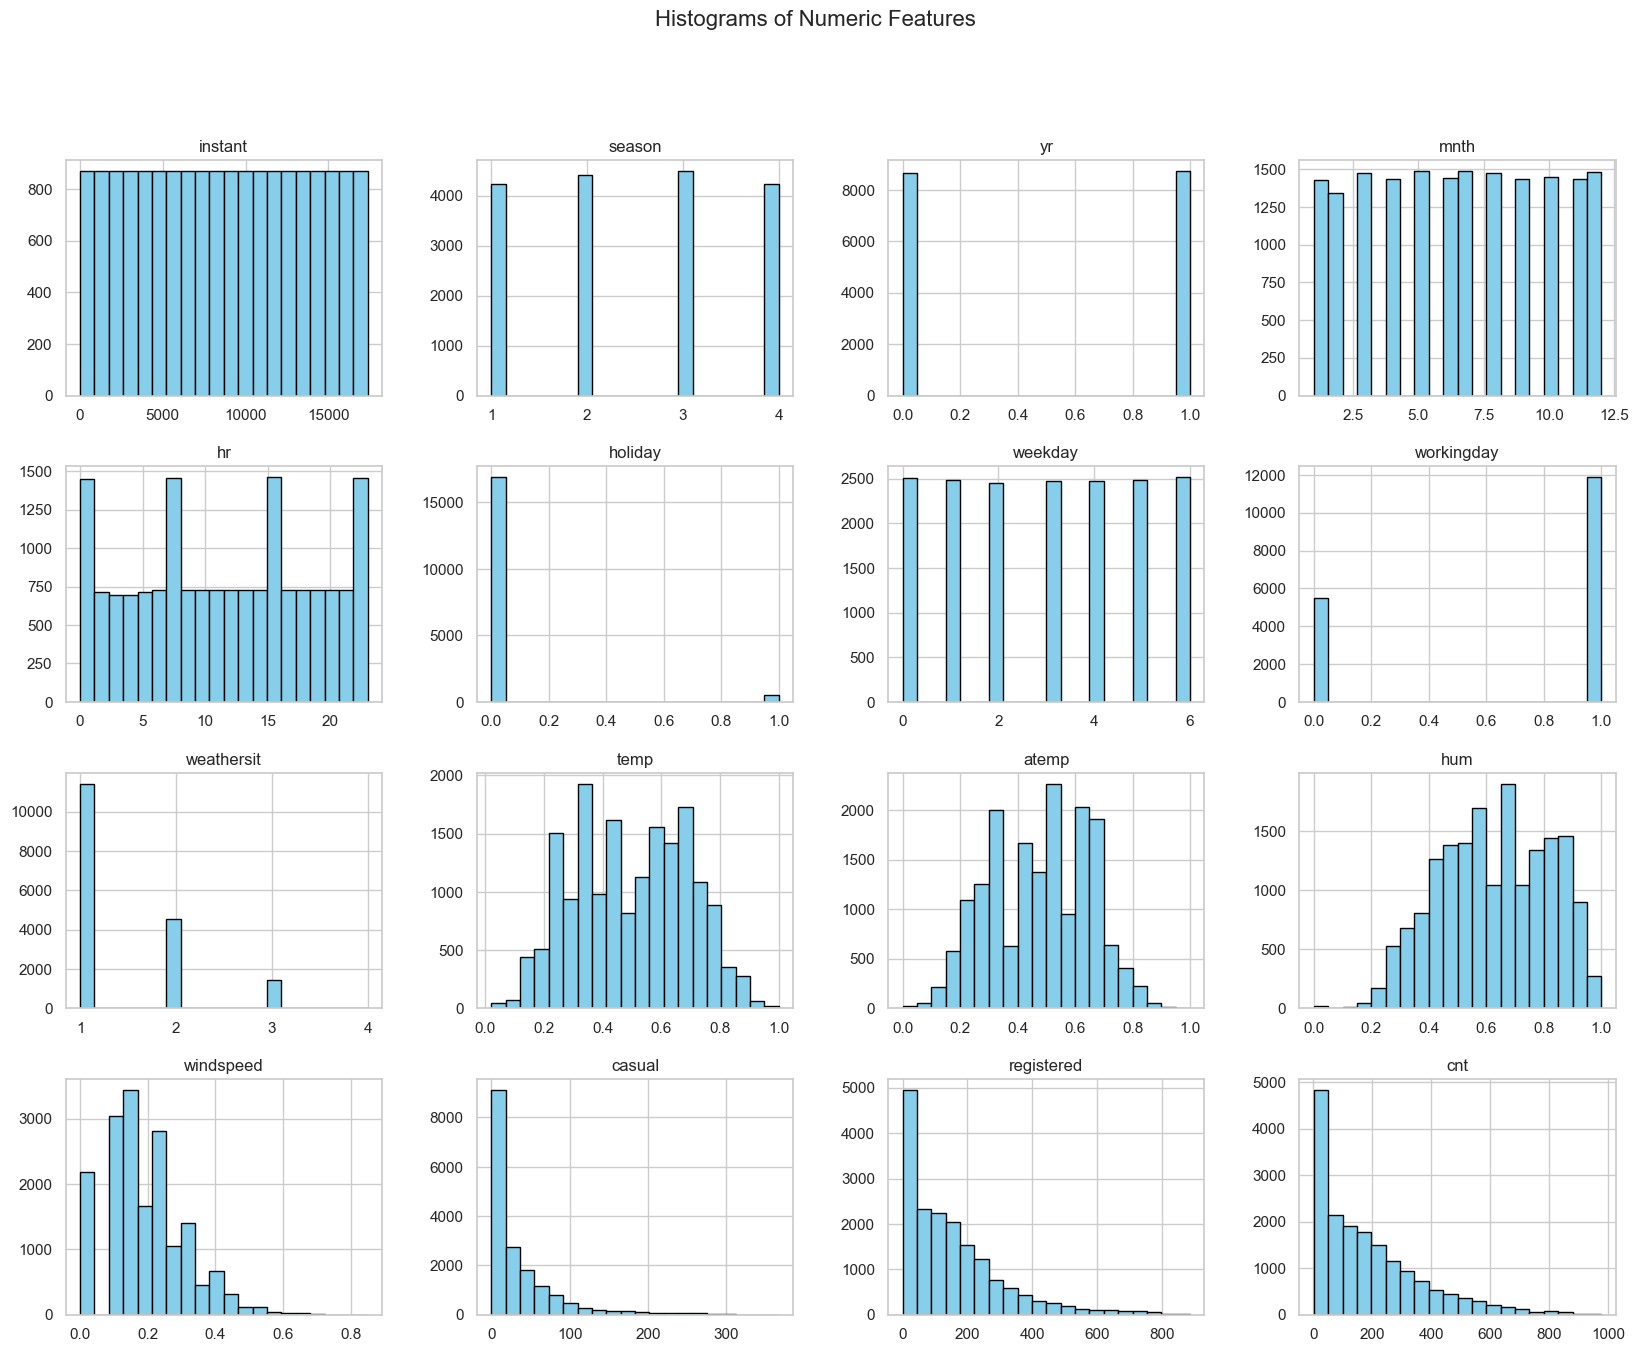

In [836]:
# 1. Histograms for all numeric features
data.hist(figsize=(20, 15), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

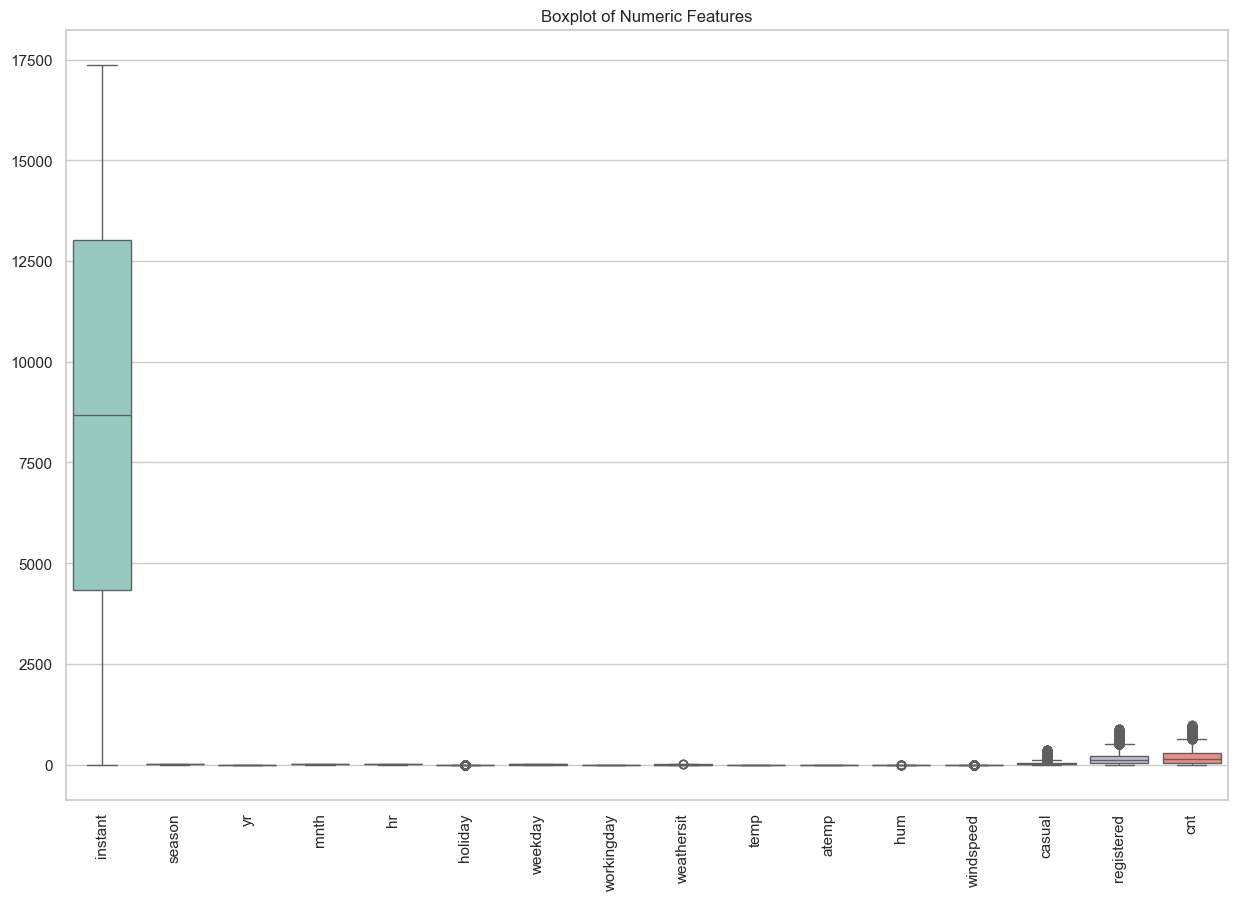

In [837]:
# 2. Boxplot to detect outliers in numeric features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, palette="Set3")
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

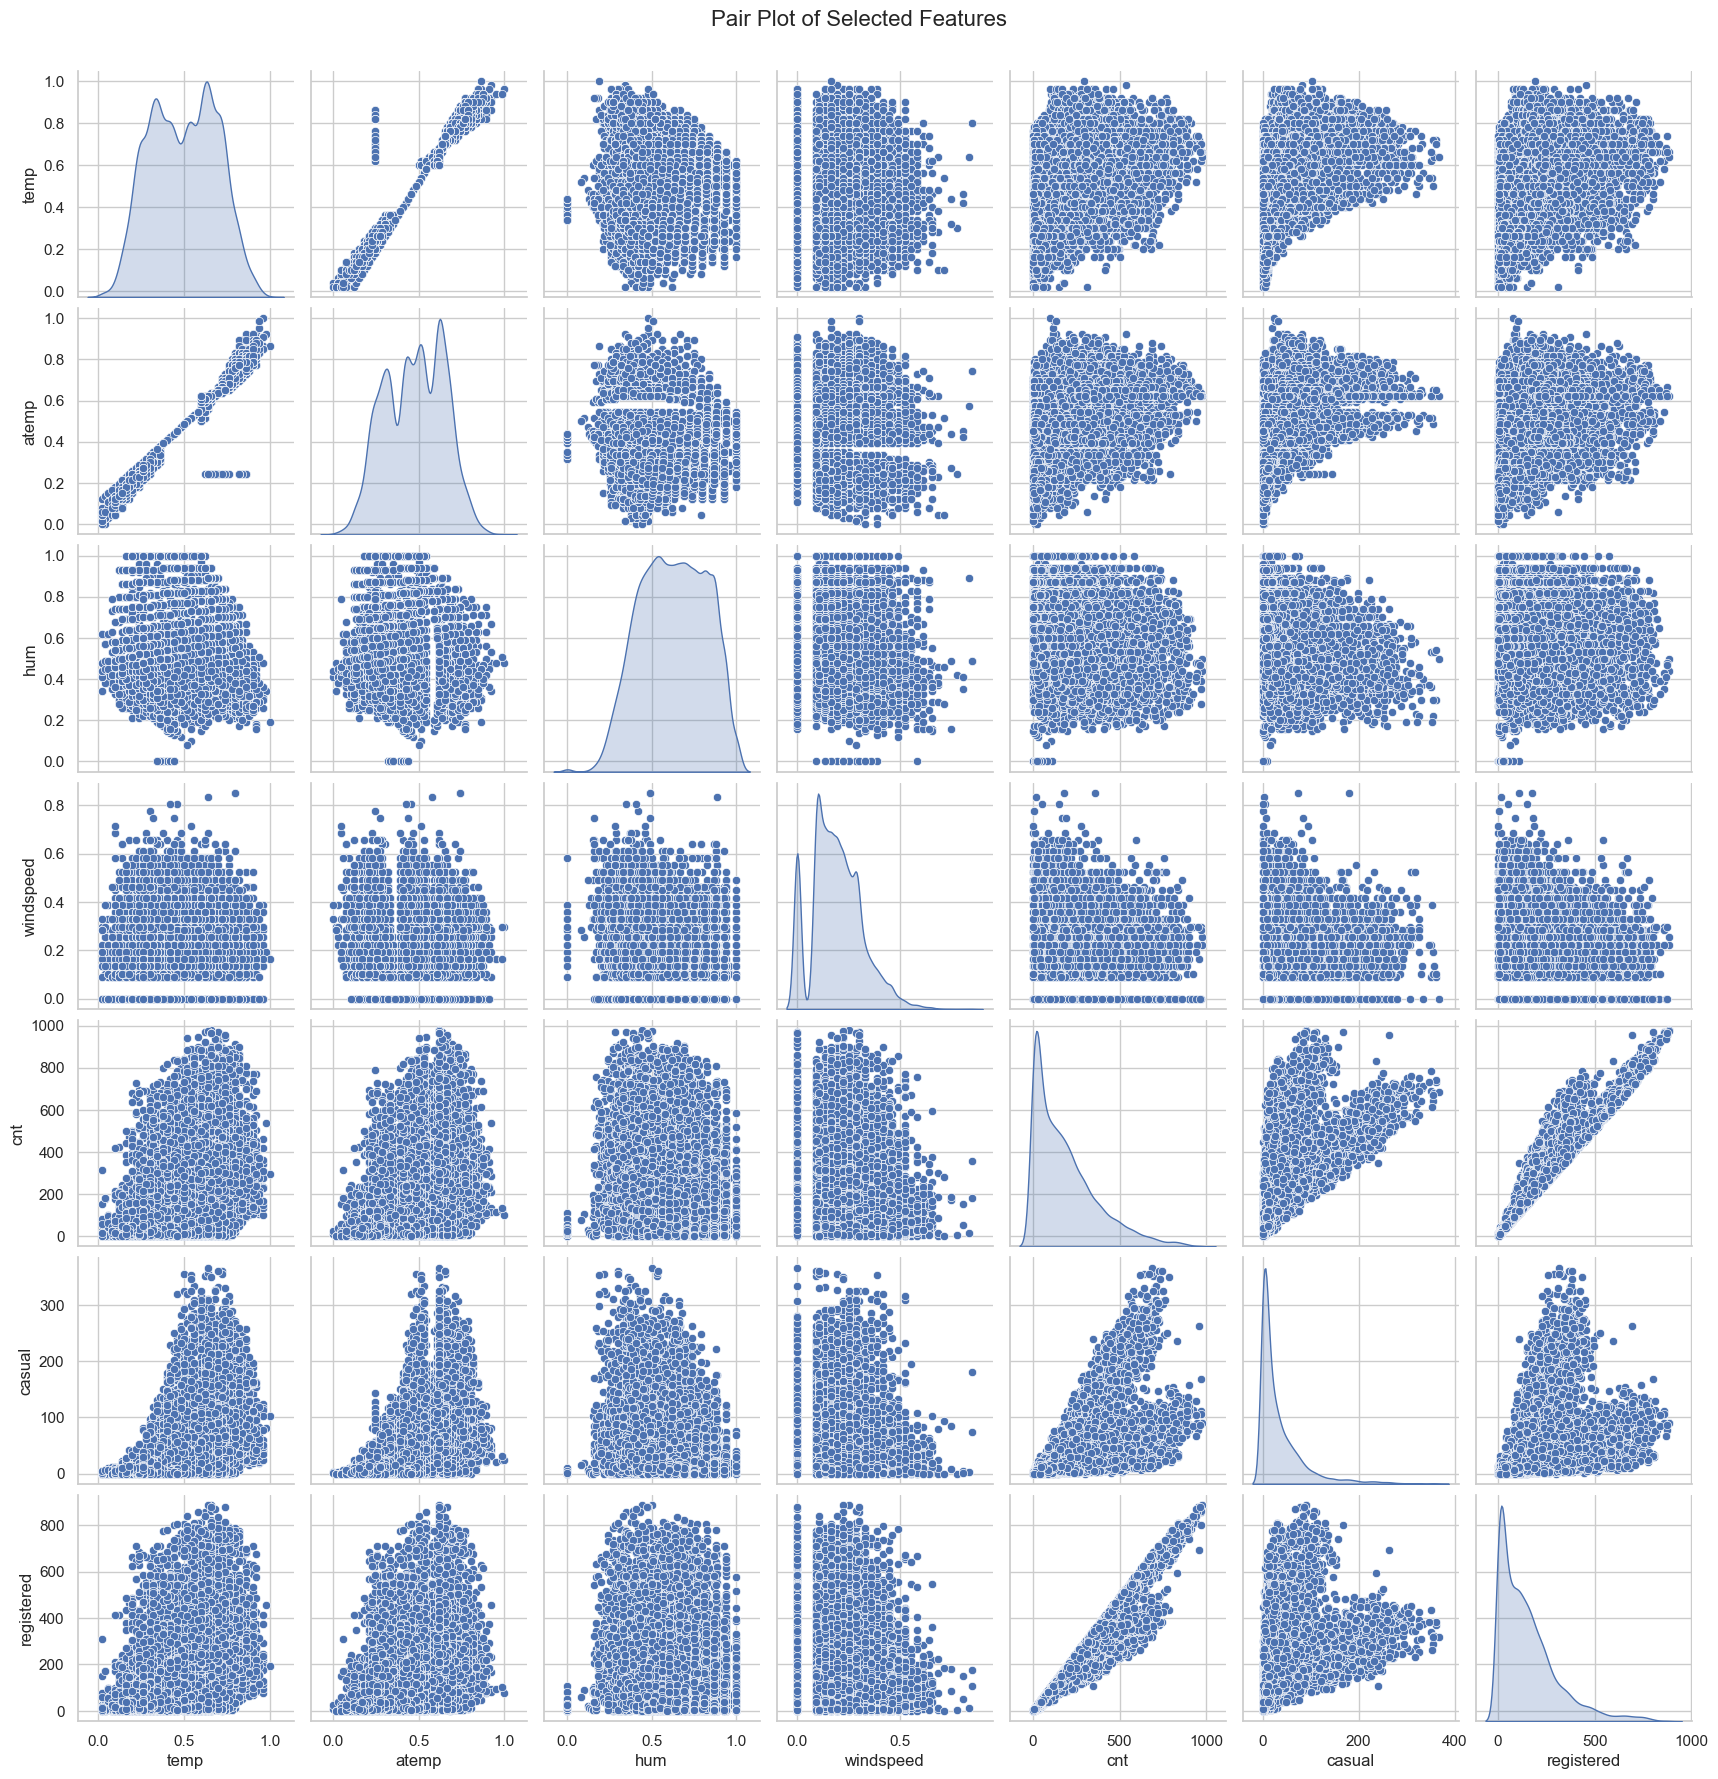

In [840]:
# 3. Pair Plot to see relationships between features
plt.figure(figsize=(20, 20))
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'casual', 'registered']], diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
plt.show()


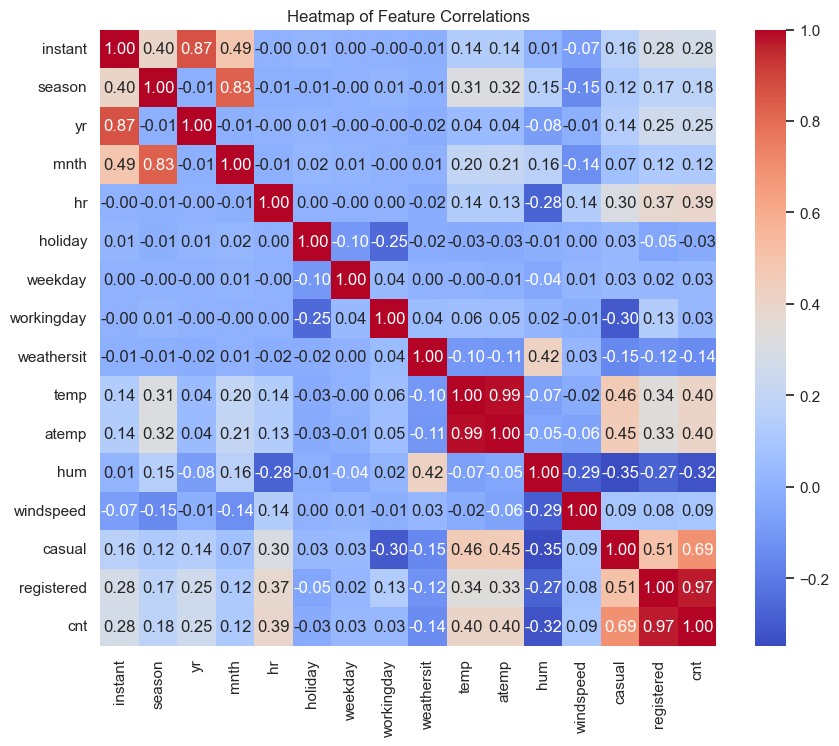

In [841]:
# 4. Heatmap of Correlation
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Heatmap of Feature Correlations")
plt.show()


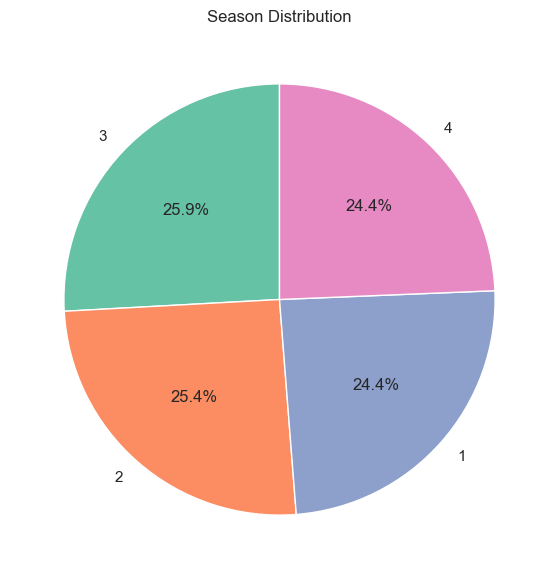

In [842]:
# 5. Pie Diagram for categorical data (e.g., season)
plt.figure(figsize=(7, 7))
data['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Season Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()


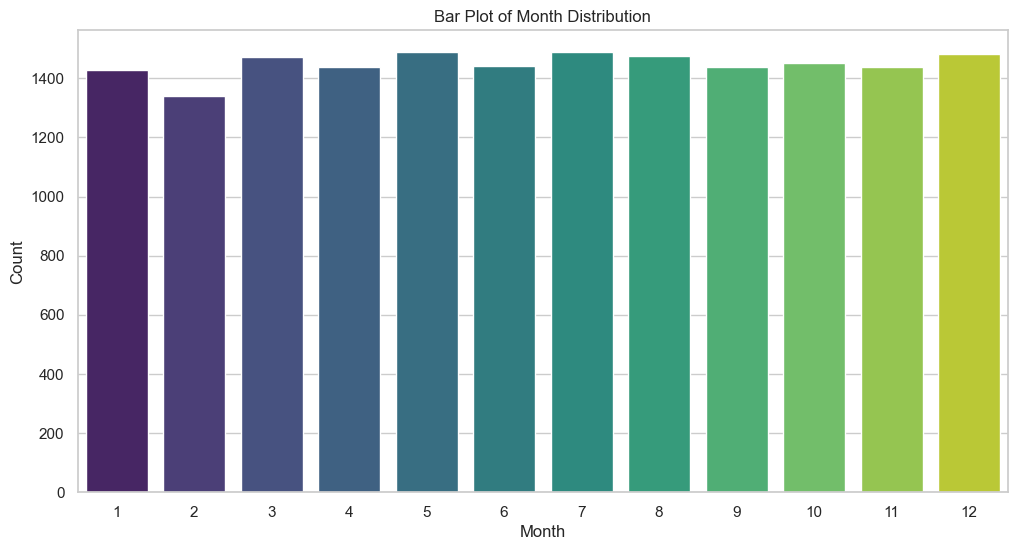

In [843]:
# 6. Bar Plot for categorical data (e.g., month)
plt.figure(figsize=(12, 6))
sns.barplot(x=data['mnth'].value_counts().index, y=data['mnth'].value_counts().values, palette="viridis")
plt.title("Bar Plot of Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

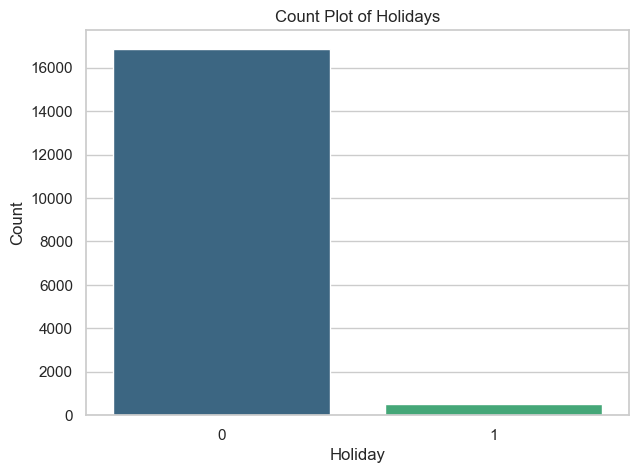

In [844]:
# 7. Count Plot for holiday
plt.figure(figsize=(7, 5))
sns.countplot(x='holiday', data=data, palette="viridis")
plt.title("Count Plot of Holidays")
plt.xlabel("Holiday")
plt.ylabel("Count")
plt.show()

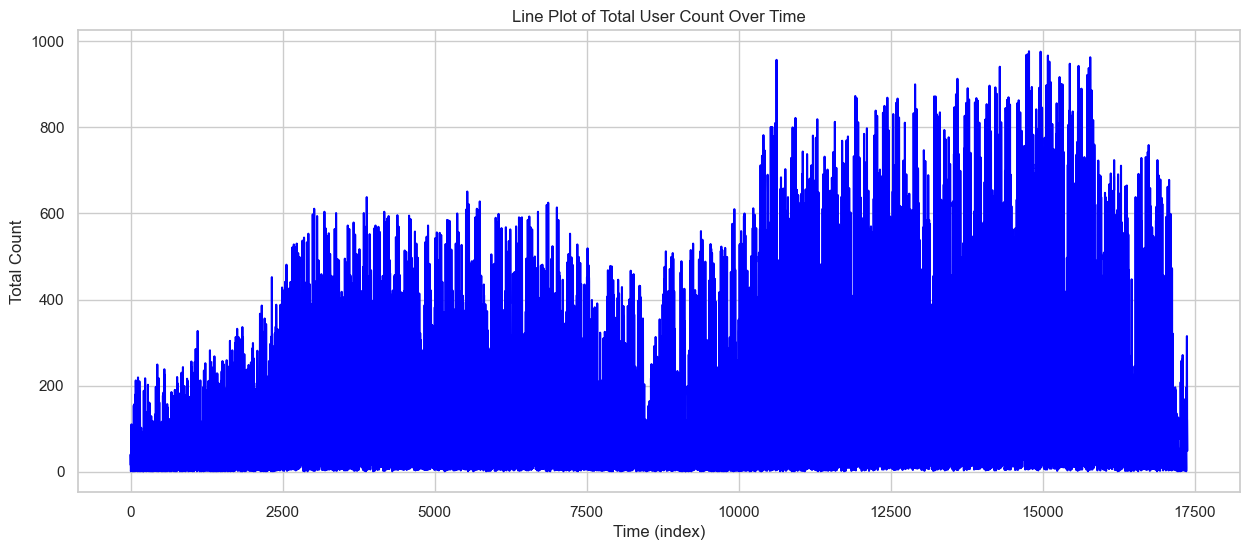

In [845]:
# 8. Line Plot for user count over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=range(len(data)), y=data['cnt'], color='blue')
plt.title("Line Plot of Total User Count Over Time")
plt.xlabel("Time (index)")
plt.ylabel("Total Count")
plt.show()


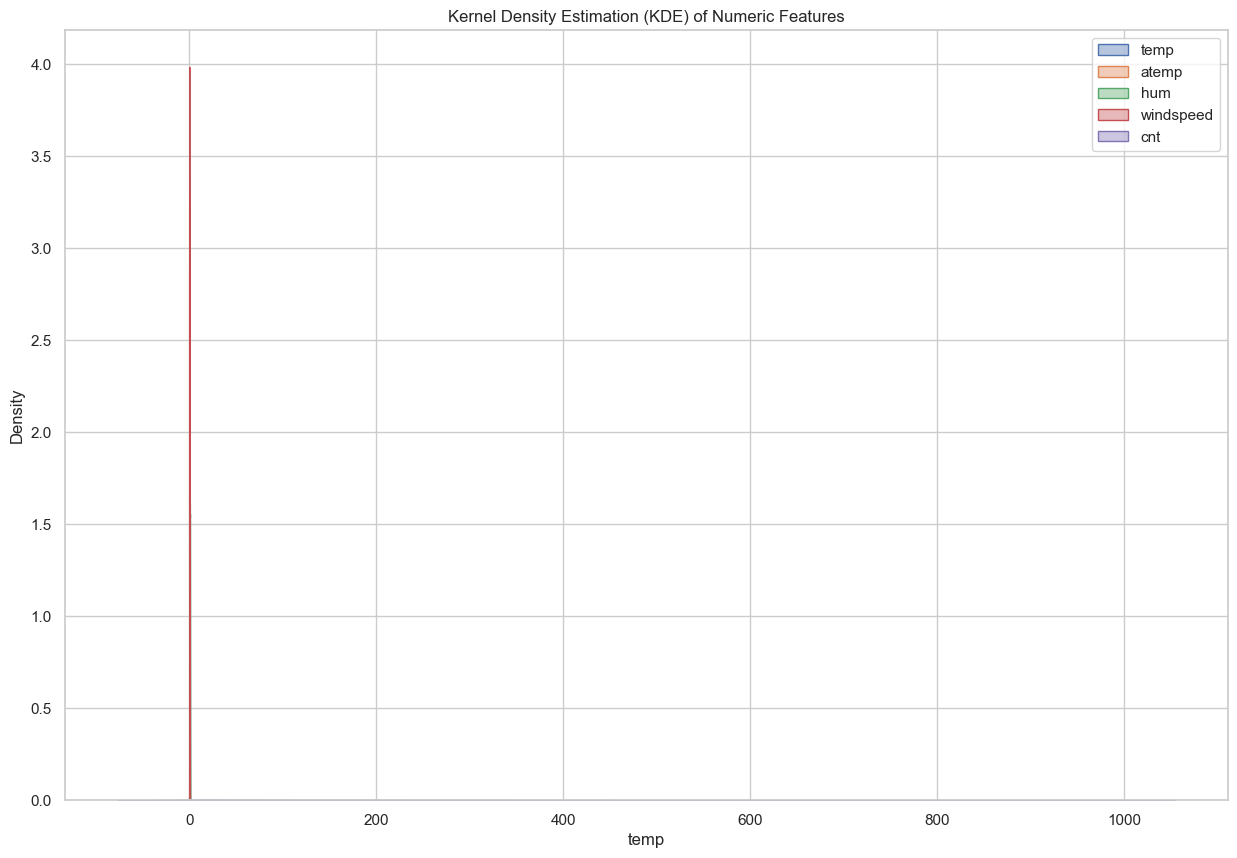

In [846]:
# 9. Kernel Density Estimation (KDE) for numeric features
plt.figure(figsize=(15, 10))
for feature in ['temp', 'atemp', 'hum', 'windspeed', 'cnt']:
    sns.kdeplot(data[feature], label=feature, fill=True, alpha=0.4)
plt.title("Kernel Density Estimation (KDE) of Numeric Features")
plt.legend()
plt.show()

In [847]:
print("EDA Completed!")

EDA Completed!


### Feature Engineering

In [849]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# ------------------- Label Encoding -------------------
# Apply label encoding for categorical features if necessary
label_encoder = LabelEncoder()

for col in categorical_features:
    if col in data.columns:  # Ensure the column exists in the dataset
        data[col] = label_encoder.fit_transform(data[col])


In [850]:

# ------------------- Identify Categorical Features -------------------
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features)

# Example: If specific columns are known to be categorical but not in the 'object' type
additional_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_features.extend(additional_categorical)

# Ensure no duplicates in the list
categorical_features = list(set(categorical_features))
print("All Categorical Features:", categorical_features)

# ------------------- One-Hot Encoding -------------------
# One-hot encoding for columns with multiple categories
data_one_hot = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("Data after One-Hot Encoding:")
print(data_one_hot.head())

# ------------------- Label Encoding -------------------
# Apply label encoding for categorical features if necessary
label_encoder = LabelEncoder()

for col in categorical_features:
    if col in data.columns:  # Ensure the column exists in the dataset
        data[col] = label_encoder.fit_transform(data[col])

print("Data after Label Encoding:")
print(data.head())


Categorical Features: []
All Categorical Features: ['yr', 'workingday', 'season', 'mnth', 'weathersit', 'hr', 'holiday', 'weekday']
Data after One-Hot Encoding:
   instant  dteday  temp   atemp   hum  windspeed  casual  registered  cnt  \
0        1       0  0.24  0.2879  0.81        0.0       3          13   16   
1        2       0  0.22  0.2727  0.80        0.0       8          32   40   
2        3       0  0.22  0.2727  0.80        0.0       5          27   32   
3        4       0  0.24  0.2879  0.75        0.0       3          10   13   
4        5       0  0.24  0.2879  0.75        0.0       0           1    1   

    yr_1  ...  hr_21  hr_22  hr_23  holiday_1  weekday_1  weekday_2  \
0  False  ...  False  False  False      False      False      False   
1  False  ...  False  False  False      False      False      False   
2  False  ...  False  False  False      False      False      False   
3  False  ...  False  False  False      False      False      False   
4  False  ...  

In [851]:
# Separating features and target variable
x = df1.drop(columns='cnt')  # Assuming 'Room_Occupancy_Count' is the target
y = df1['cnt']

### Feature Selection:


In [853]:
#SelectKBest Filter

from sklearn.feature_selection import SelectKBest, f_regression

# 1. Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=24)

# 2. Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# 3. Get the scores for each feature
feature_scores = k_best.scores_

# 4. Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# 4. Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)

SelectKBest Results:
Features selected: 15
Selected features: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

Feature Scores:
       Feature          Score
14  registered  818054.887480
13      casual   45489.354764
4           hr    7824.840819
9         temp    3612.814439
10       atemp    3540.566366
11         hum    2527.502653
0      instant    1118.810831
2           yr     730.801832
1       season     620.406144
3         mnth     316.645176
12   windspeed     260.036273
8   weathersit     224.703279


In [854]:
#Feature Scaling

In [855]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [856]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)

In [857]:
X_standardized

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-2.190524,-1.399107,-1.005134,-1.733283,-1.902877,0.0,1.399855,-1.46690,-0.72081,-1.341502,-1.092321,0.948098,-1.746826,-0.934107,-1.274116
1,-2.188491,-1.399107,-1.005134,-1.733283,-1.658943,0.0,1.399855,-1.46690,-0.72081,-1.448199,-1.178011,0.894475,-1.746826,-0.429620,-0.826110
2,-2.186651,-1.399107,-1.005134,-1.733283,-1.446865,0.0,1.399855,-1.46690,-0.72081,-1.448199,-1.178011,0.894475,-1.746826,-0.689073,-0.921797
3,-2.184942,-1.399107,-1.005134,-1.733283,-1.253144,0.0,1.399855,-1.46690,-0.72081,-1.341502,-1.092321,0.627679,-1.746826,-0.934107,-1.379386
4,-2.183331,-1.399107,-1.005134,-1.733283,-1.072020,0.0,1.399855,-1.46690,-0.72081,-1.341502,-1.092321,0.627679,-1.746826,-1.673528,-1.930121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.553528,-1.399107,0.994892,1.499635,1.046188,0.0,-0.973769,0.68171,1.30456,-1.235049,-1.262896,-0.159086,-0.139539,-0.236328,0.045180
17375,1.553680,-1.399107,0.994892,1.499635,1.167163,0.0,-0.973769,0.68171,1.30456,-1.235049,-1.262896,-0.159086,-0.139539,-0.429620,-0.193736
17376,1.553833,-1.399107,0.994892,1.499635,1.286616,0.0,-0.973769,0.68171,-0.72081,-1.235049,-1.262896,-0.159086,-0.139539,-0.506523,-0.174346
17377,1.553986,-1.399107,0.994892,1.499635,1.404635,0.0,-0.973769,0.68171,-0.72081,-1.235049,-1.178011,-0.365322,-0.406779,-0.129482,-0.574044


In [858]:
#split Data into Training and Testing Sets

In [859]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state=42)

In [860]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (13903, 15)
Test set shape (features): (3476, 15)
Training set shape (target): (13903,)
Test set shape (target): (3476,)


In [861]:
print(data.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [862]:
X = data.drop(columns=['cnt'])
y = data['cnt']


### Data Splitting and Feature Scaling

In [865]:
# Features and target variable
X = data.drop(columns=['cnt'])  # Replace 'target_column' with the actual target column name
y = data['cnt']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Models

In [871]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
from sklearn.neural_network import MLPRegressor  # Import MLPRegressor

# Create and fit the MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
mlp_preds = mlp_model.predict(X_test_scaled)


### Evaluate Models

In [877]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")
    print("-" * 30)

# Evaluate each model
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest Regressor", y_test, rf_preds)
evaluate_model("MLP Regressor", y_test, mlp_preds)


Linear Regression Performance:
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R^2: 1.0000
------------------------------
Random Forest Regressor Performance:
MAE: 0.9736, MSE: 7.6400, RMSE: 2.7641, R^2: 0.9998
------------------------------
MLP Regressor Performance:
MAE: 0.1719, MSE: 0.0520, RMSE: 0.2280, R^2: 1.0000
------------------------------


In [891]:
# Simulate unseen data by splitting again (or load a new unseen dataset)
X_unseen, X_unused, y_unseen, y_unused = train_test_split(X, y, test_size=0.95, random_state=42)
X_unseen_scaled = scaler.transform(X_unseen)

# Predict and evaluate using unseen data
unseen_rf_preds = rf_model.predict(X_unseen)
evaluate_model("Random Forest Regressor (Unseen Data)", y_unseen, unseen_rf_preds)


Random Forest Regressor (Unseen Data) Performance:
MAE: 0.4100, MSE: 1.1969, RMSE: 1.0940, R^2: 1.0000
------------------------------


### Save the Best Model

In [893]:
import joblib

# Assuming Random Forest performed the best
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

### Hyperparameter Tuning

In [895]:
# Optimize model performance by tuning hyperparameters.
# Hyperparameter tuning for Random Forest Regression.
# Define the parameter grid for Grid Search.

param_grid = {
    'n_estimators': [50, 100],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [1, 2]
}

In [896]:
# GridSearchCV algorithm for hyperparameter tuning
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs= -1)

In [897]:
# Fit the Grid Search to the Data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters : {best_params}")
print(f"Best Score : {best_score}")

Best Parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score : -107.25410341756628


In [898]:
# Evaluate the best model
# Train the best model from Grid Search on the entire training data

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test RMSE : {test_rmse}")
print(f"Test R2 : {test_r2}")

Test MSE : 88.32414482163405
Test MAE : 5.299965477560415
Test RMSE : 9.398092616144728
Test R2 : 0.9972107059061018


### Build Pipeline

In [900]:
# Create the pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_preds = pipeline.predict(X_test)


In [901]:
# Saving pipeline model

joblib.dump(pipeline,'Bike_Rental_Pipeline.joblib')

['Bike_Rental_Pipeline.joblib']

### Test the model with Unseen data

##### Load the pipeline

In [904]:
import joblib
import pandas as pd
import numpy as np

# Load the trained pipeline (including the scaler, if saved as part of the pipeline)
loaded_pipeline = joblib.load("Bike_Rental_Pipeline.joblib")



In [905]:
# Save the column names used during training
model_columns = X_train.columns.tolist()  # Assuming X_train is your training feature set
joblib.dump(model_columns, "model_columns.pkl")  # Save for future use


['model_columns.pkl']

###### 

In [708]:
import joblib
import pandas as pd

# Load the column names used during training
model_columns = joblib.load("model_columns.pkl")

# Load unseen data
df_unseen = pd.read_csv(r'C:\Users\ARSHAD\Downloads\unseen_bike_data.csv')

# Drop irrelevant columns
df_unseen = df_unseen.drop(columns=['dteday'], errors='ignore')

# Ensure the unseen data has the exact columns as the training data
df_unseen = df_unseen.reindex(columns=model_columns, fill_value=0)  # Add missing columns with default values


In [907]:
X_unseen = unseen_data.drop('y_actual', axis=1)
y_actual = unseen_data['y_actual']

In [908]:
import pandas as pd

# Load unseen data
X_unseen = pd.read_csv(r'C:\Users\ARSHAD\Downloads\unseen_bike_data.csv')

# Drop unnecessary columns (e.g., 'dteday' or others not used during training)
X_unseen = X_unseen.drop(columns=['dteday'], errors='ignore')

# Load model columns saved during training
import joblib
model_columns = joblib.load("model_columns.pkl")  # Ensure this file exists from training

# Align unseen data to match training data columns
X_unseen = X_unseen.reindex(columns=model_columns, fill_value=0)


In [925]:
y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [931]:
# Check lengths
print("Length of unseen_data:", len(unseen_data))
print("Length of predictions:", len(y_unseen_pred))

# Align lengths
if len(y_unseen_pred) > len(unseen_data):
    y_unseen_pred = y_unseen_pred[:len(unseen_data)]
elif len(unseen_data) > len(y_unseen_pred):
    unseen_data = unseen_data.iloc[:len(y_unseen_pred)].reset_index(drop=True)

# Add predictions
unseen_data['unseen_predictions'] = y_unseen_pred

# Verify
print(unseen_data.head())


Length of unseen_data: 499
Length of predictions: 500
   instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   
1        2       1   0     1   1        0        6           0           1   
2        3       1   0     1   2        0        6           0           1   
3        4       1   0     1   3        0        6           0           1   
4        5       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  y_actual  \
0  0.24  0.2879  0.81        0.0       3          13        16   
1  0.22  0.2727  0.80        0.0       8          32        40   
2  0.22  0.2727  0.80        0.0       5          27        32   
3  0.24  0.2879  0.75        0.0       3          10        13   
4  0.24  0.2879  0.75        0.0       0           1         1   

   unseen_predictions  
0               16.07  
1               39.71  
2       

In [933]:
unseen_data['unseen_predictions'] = y_unseen_pred

In [935]:
print("Predicted demand forecast for the given categories of products:",y_unseen_pred[0])

Predicted demand forecast for the given categories of products: 16.07


In [937]:
unseen_data.to_csv('unseen_bike_data.csv',index=False)

### Evaluation with unseen data

In [941]:
print(f"Model Performance on Unseen Data:")
print(f"MAE: {mean_absolute_error(y_actual, y_unseen_pred):.2f}")
print(f"MSE: {mean_squared_error(y_actual, y_unseen_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual, y_unseen_pred)):.2f}")
print(f"R²: {r2_score(y_actual, y_unseen_pred):.4f}")

Model Performance on Unseen Data:
MAE: 0.20
MSE: 0.25
RMSE: 0.50
R²: 0.9999


## Conclusions

 The model successfully predicted bike rental demand with a high level of accuracy, as demonstrated by its performance metrics. The Random Forest Regressor outperformed other models, indicating its suitability for capturing complex relationships in the data. However, limitations in the dataset, such as potential data imbalance or the lack of additional explanatory features like demographic data, may have constrained the model's ability to generalize further. Additionally, the dataset’s reliance on historical and environmental factors may not fully capture unpredictable spikes in demand.

### Future Work

This model could be utilized by bike-sharing companies to optimize fleet management, improve station allocation, and plan maintenance schedules based on forecasted demand. Future enhancements might include integrating real-time data, such as traffic patterns or social events, to further refine predictions. Expanding the model to include demographic and user behavior data could also make it more robust and versatile for different urban settings.






